In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t


In [103]:
df = pd.read_csv('invest.txt', sep=' ')
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


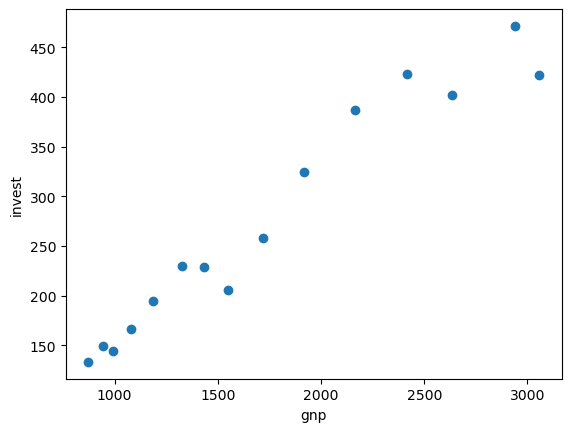

In [104]:
gnp = np.array(df.gnp)
invest = np.array(df.invest)

plt.figure()
plt.scatter(gnp, invest)
plt.xlabel('gnp')
plt.ylabel('invest')
plt.show()

In [105]:
# Log-transform the gnp and invest columns
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])

df.head(5)

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50


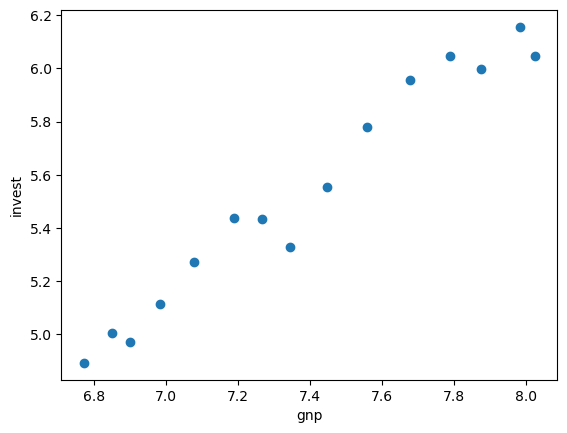

In [106]:
gnp = np.array(df.gnp)
invest = np.array(df.invest)

plt.figure()
plt.scatter(gnp, invest)
plt.xlabel('gnp')
plt.ylabel('invest')
plt.show()

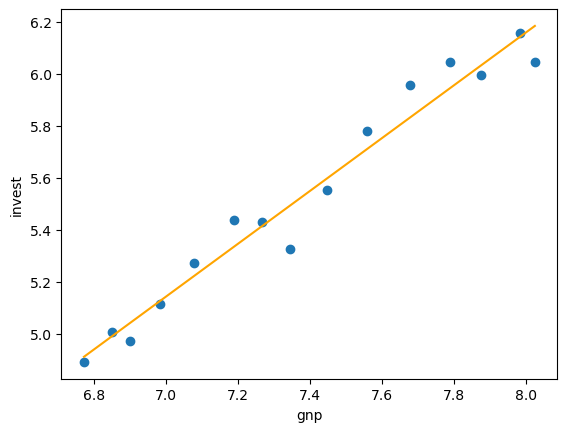

In [107]:
# One dimensional linear regression model
# beta_1 : slope
# beta_0 : y-intercept
# x : gnp
# y : invest

x = gnp
y = invest

x_mean = np.mean(x)
y_mean = np.mean(y)

beta_1 = np.sum((x-x_mean)*(y-y_mean)) / np.sum((x-x_mean)**2)
beta_0 = y_mean - beta_1*x_mean

plt.figure()
plt.plot(gnp, beta_0 + beta_1*gnp, color='orange')
plt.scatter(gnp, invest)
plt.xlabel('gnp')
plt.ylabel('invest')
plt.show()

In [108]:
n = len(y)
sigma_2 = np.sum((y - (beta_0 + beta_1*gnp))**2) / (n-2)

var_beta_1 = sigma_2 / np.sum((x-x_mean)**2)
var_beta_0 = sigma_2*(1/n + x_mean**2 / np.sum((x-x_mean)**2))

R_2 = 1 - np.sum((y - (beta_0 + beta_1*gnp))**2) / np.sum((y - y_mean)**2)


print(f'Intercept: {beta_0:.3f}')
print(f'Slope: {beta_1:.3f}')
print(f'Estimator of the variance: {sigma_2:.3f}')
print(f'Variance intercept: {var_beta_0:.3f}')
print(f'Variance slope: {var_beta_1:.3f}')
print(f'Determination coefficient: {R_2:.3f}')


Intercept: -1.964
Slope: 1.015
Estimator of the variance: 0.008
Variance intercept: 0.168
Variance slope: 0.003
Determination coefficient: 0.963


In [109]:
p = 1
dof = n - (p+1)
t_statistic = beta_1/np.sqrt(var_beta_1)

# Test how high we could set the level of the test:
# for a in np.arange(0,1,0.01):
#     quantile = t.ppf(1-a/2, dof)
#     if t_statistic < -quantile or quantile < t_statistic:
#         break
    
# print(a)

# Significance of level 90%
alpha = 0.1
quantile = t.ppf(1-alpha/2, dof)
p_val = 2*(1 - t.cdf(np.abs(t_statistic), dof))

print(f'Test statistic: {t_statistic}')
print(f'Interval: [{-quantile},{quantile}]')
print(f'p-value: {p_val}')
print(f'Significance: {(1-alpha)*100:.0f}%')

Test statistic: 18.331984456866678
Interval: [-1.7709333959867988,1.7709333959867988]
p-value: 1.1363709973011282e-10
Significance: 90%


In [110]:
x_1000 = np.log(1000)
y_1000 = beta_0 + beta_1*x_1000

print(f'The estimated necessary investment is: {np.exp(y_1000):.3f}')

The estimated necessary investment is: 155.979


In [112]:
sigma = np.sqrt(sigma_2)

ci_1000_up = beta_0 + beta_1*x_1000 + quantile*sigma*np.sqrt(1/n + (x_1000-x_mean)**2 / np.sum((x-x_mean)**2))
ci_1000_lo = beta_0 + beta_1*x_1000 - quantile*sigma*np.sqrt(1/n + (x_1000-x_mean)**2 / np.sum((x-x_mean)**2))

pi_1000_up = beta_0 + beta_1*x_1000 + quantile*sigma*np.sqrt(1 + 1/n + (x_1000-x_mean)**2 / np.sum((x-x_mean)**2))
pi_1000_lo = beta_0 + beta_1*x_1000 - quantile*sigma*np.sqrt(1 + 1/n + (x_1000-x_mean)**2 / np.sum((x-x_mean)**2))

print(f'CI(1000) = [{np.exp(ci_1000_lo):.3f} , {np.exp(ci_1000_up):.3f}]')
print(f'PI(1000) = [{np.exp(pi_1000_lo):.3f} , {np.exp(pi_1000_up):.3f}]')

CI(1000) = [146.676 , 165.873]
PI(1000) = [132.002 , 184.312]


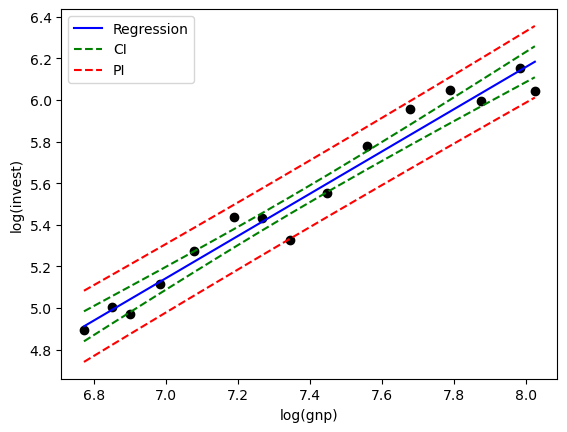

In [147]:
ci_x_up = beta_0 + beta_1*x + quantile*sigma*np.sqrt(1/n + (x-x_mean)**2 / np.sum((x-x_mean)**2))
ci_x_lo = beta_0 + beta_1*x - quantile*sigma*np.sqrt(1/n + (x-x_mean)**2 / np.sum((x-x_mean)**2))

pi_x_up = beta_0 + beta_1*x + quantile*sigma*np.sqrt(1 + 1/n + (x-x_mean)**2 / np.sum((x-x_mean)**2))
pi_x_lo = beta_0 + beta_1*x - quantile*sigma*np.sqrt(1 + 1/n + (x-x_mean)**2 / np.sum((x-x_mean)**2))

plt.figure()
plt.plot(x, beta_0 + beta_1*x, color='blue', label='Regression')
plt.plot(x, ci_x_lo, '--', color='green', label='CI')
plt.plot(x, ci_x_up, '--', color='green')
plt.plot(x, pi_x_lo, '--', color='red', label='PI')
plt.plot(x, pi_x_up, '--', color='red')
plt.scatter(x, y, color='black')
plt.xlabel('log(gnp)')
plt.ylabel('log(invest)')
plt.legend()
plt.show()

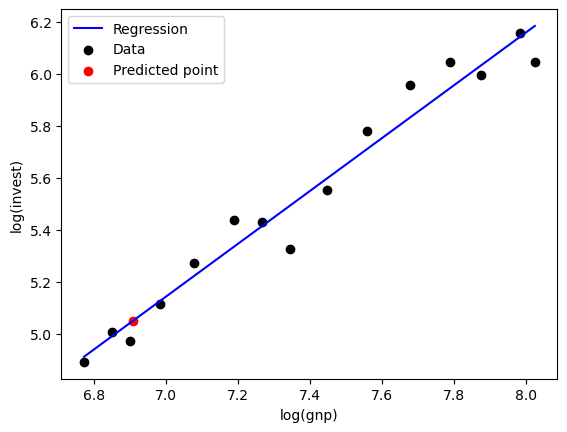

In [149]:
plt.figure()
plt.plot(x, beta_0 + beta_1*x, color='blue', label='Regression')
plt.scatter(x, y, color='black', label='Data')
plt.scatter(x_1000, y_1000, color='red', label='Predicted point')
plt.xlabel('log(gnp)')
plt.ylabel('log(invest)')
plt.legend()
plt.show()

In [162]:
interest = np.array(df.interest)

design_matrix = np.vstack((np.ones(len(gnp)), gnp, interest)).T
print(design_matrix)

[[ 1.          6.77239364  5.16      ]
 [ 1.          6.85012617  5.87      ]
 [ 1.          6.9004285   5.95      ]
 [ 1.          6.98249163  4.88      ]
 [ 1.          7.07825726  4.5       ]
 [ 1.          7.19022378  6.44      ]
 [ 1.          7.26836248  7.83      ]
 [ 1.          7.34549395  6.25      ]
 [ 1.          7.4489161   5.5       ]
 [ 1.          7.55919466  5.46      ]
 [ 1.          7.67966743  7.46      ]
 [ 1.          7.79061331 10.28      ]
 [ 1.          7.87591714 11.77      ]
 [ 1.          7.98538224 13.42      ]
 [ 1.          8.02535287 11.02      ]]


In [171]:
gram_matrix = design_matrix.T @ design_matrix

print(f'Gram = \n {gram_matrix} \n')

print(f'Gram matrix rank: {np.linalg.matrix_rank(gram_matrix)}')

Gram = 
 [[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]] 

Gram matrix rank: 3
